In [64]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# read the CSV file
climate_df = pd.read_csv('climate_change.csv', parse_dates=['Year'], index_col=['Year'])
# display the first few rows of the DataFrame
print(climate_df.head())

            Month    MEI     CO2      CH4      N2O   CFC-11   CFC-12  \
Year                                                                   
1983-01-01      5  2.556  345.96  1638.59  303.677  191.324  350.113   
1983-01-01      6  2.167  345.52  1633.71  303.746  192.057  351.848   
1983-01-01      7  1.741  344.15  1633.22  303.795  192.818  353.725   
1983-01-01      8  1.130  342.25  1631.35  303.839  193.602  355.633   
1983-01-01      9  0.428  340.17  1648.40  303.901  194.392  357.465   

                  TSI  Aerosols   Temp  
Year                                    
1983-01-01  1366.1024    0.0863  0.109  
1983-01-01  1366.1208    0.0794  0.118  
1983-01-01  1366.2850    0.0731  0.137  
1983-01-01  1366.4202    0.0673  0.176  
1983-01-01  1366.2335    0.0619  0.149  


In [66]:
# Checking for missing value
climate_df.isna().sum()

Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

Determining the correlation

In [67]:
# correlation between CO2 and Temp
print(f"Correlation between CO2 and Temp = {round(climate_df['CO2'].corr(climate_df['Temp']), 2)}")

# correlation between N2O and Temp
print(f"Correlation between N2O and Temp = {round(climate_df['N2O'].corr(climate_df['Temp']), 2)}")

# correlation between CH4 and Temp
print(f"Correlation between CH4 and Temp = {round(climate_df['CH4'].corr(climate_df['Temp']), 2)}")

Correlation between CO2 and Temp = 0.75
Correlation between N2O and Temp = 0.74
Correlation between CH4 and Temp = 0.7


Obviously the correlation between CO2 and Temp is stronger compared to N2O and CH4, even though all of them are strongly pisitively correlated

The correlation can be shown using heatmap

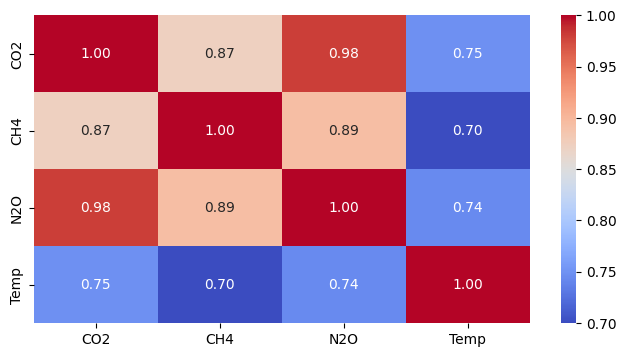

In [68]:
# plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(climate_df[['CO2', 'CH4', 'N2O', 'Temp']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Time-series plot

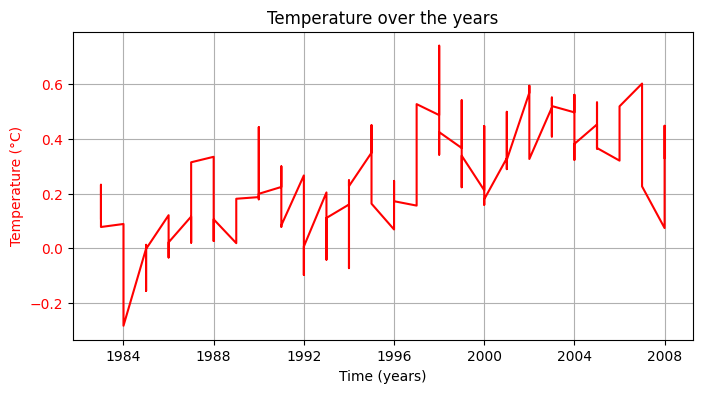

In [69]:
# Plot temperature
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(climate_df.index,climate_df['Temp'], label='Temperature', color='r')
ax.set_xlabel('Time (years)')
ax.set_ylabel('Temperature (°C)', color='r')
ax.tick_params(axis='y', labelcolor='r')
ax.set_title('Temperature over the years')
ax.grid()
plt.show()

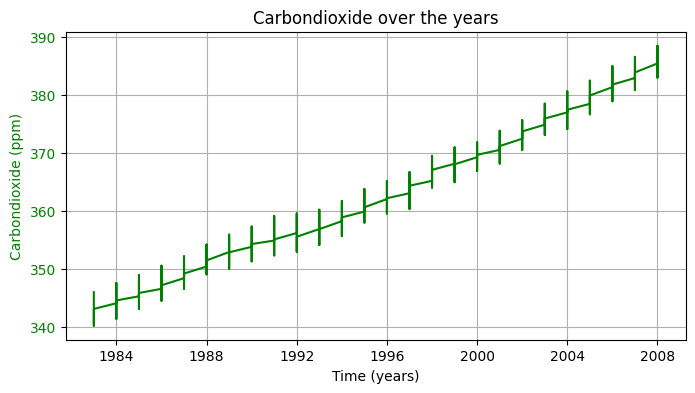

In [70]:
# plot CO2
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(climate_df.index,climate_df['CO2'], label='Carbondioxide', color='g')
ax.set_xlabel('Time (years)')
ax.set_ylabel('Carbondioxide (ppm)', color='g')
ax.tick_params(axis='y', labelcolor='g')
ax.set_title('Carbondioxide over the years')
ax.grid()
plt.show()

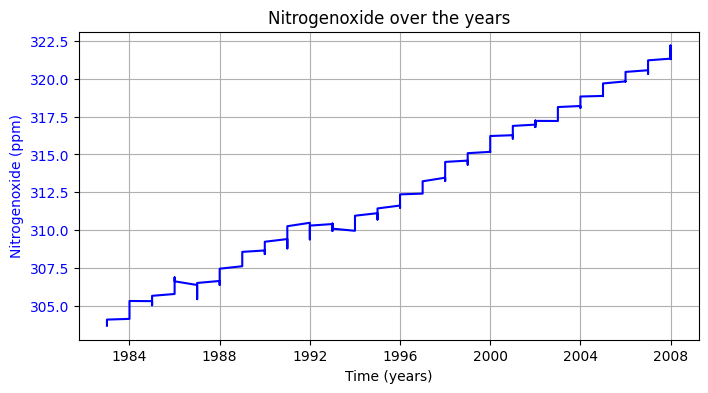

In [71]:
# plot N2O
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(climate_df.index,climate_df['N2O'], label='Nitrogenoxide', color='b')
ax.set_xlabel('Time (years)')
ax.set_ylabel('Nitrogenoxide (ppm)', color='b')
ax.tick_params(axis='y', labelcolor='b')
ax.set_title('Nitrogenoxide over the years')
ax.grid()
plt.show()

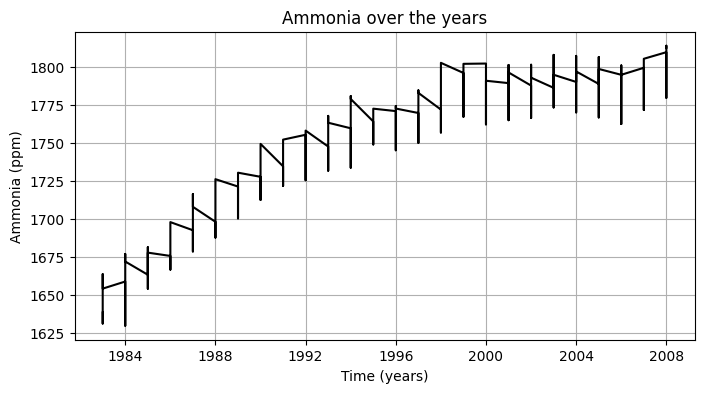

In [72]:
# plot N2O
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(climate_df.index,climate_df['CH4'], label='Ammonia', color='k')
ax.set_xlabel('Time (years)')
ax.set_ylabel('Ammonia (ppm)', color='k')
ax.tick_params(axis='y', labelcolor='k')
ax.set_title('Ammonia over the years')
ax.grid()
plt.show()

Subplots

The previous subplots method doesnt contain an arguments. Arguments can be pass to specify the number of plots requires. With first argument signifying number of row plots while the second argument plots the number of columns. This a good to bring large number of plots in to a single plot with each plot being independent.

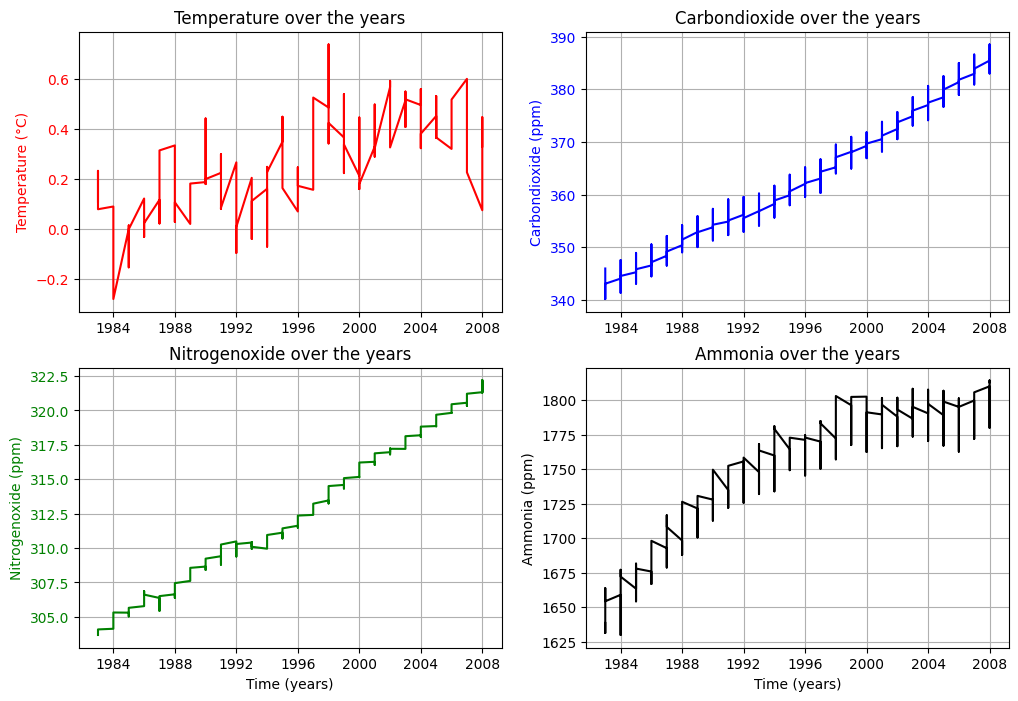

In [73]:
fig, ax=plt.subplots(2, 2, figsize=(12,8))
# plot temperature
ax[0,0].plot(climate_df.index, climate_df['Temp'], label='Temperature', color='r')
ax[0,0].set_ylabel('Temperature (°C)', color='r')
ax[0,0].tick_params(axis='y', labelcolor='r')
ax[0,0].set_title('Temperature over the years')
ax[0,0].grid()

# plot Carbondioxide
ax[0,1].plot(climate_df.index, climate_df['CO2'], label='Carbondioxide', color='b')
ax[0,1].set_ylabel('Carbondioxide (ppm)', color='b')
ax[0,1].tick_params(axis='y', labelcolor='b')
ax[0,1].set_title('Carbondioxide over the years')
ax[0,1].grid()

# plot NitrogenOxide
ax[1,0].plot(climate_df.index, climate_df['N2O'], label='Nitrogenoxide', color='g')
ax[1,0].set_ylabel('Nitrogenoxide (ppm)', color='g')
ax[1,0].set_xlabel('Time (years)')
ax[1,0].tick_params(axis='y', labelcolor='g')
ax[1,0].set_title('Nitrogenoxide over the years')
ax[1,0].grid()

# plot Ammonia
ax[1,1].plot(climate_df.index, climate_df['CH4'], label='Ammonia', color='k')
ax[1,1].set_ylabel('Ammonia (ppm)', color='k')
ax[1,1].set_xlabel('Time (years)')
ax[1,1].tick_params(axis='y', labelcolor='k')
ax[1,1].set_title('Ammonia over the years')
ax[1,1].grid()
plt.show()

Twins plot

instead of single handly plotting each data on a separate plot, matplotlib provide a means of plotting multiple data sharing similar x-axis using a twins plot.

plotiting two different column sharing the same x-axis (year)

1. Plot date Vs Temperature Vs Carbondioxide
2. Plot date Vs Temperature Vs Nitrogenoxide
3. Plot date Vs Temperature Vs Ammonia 

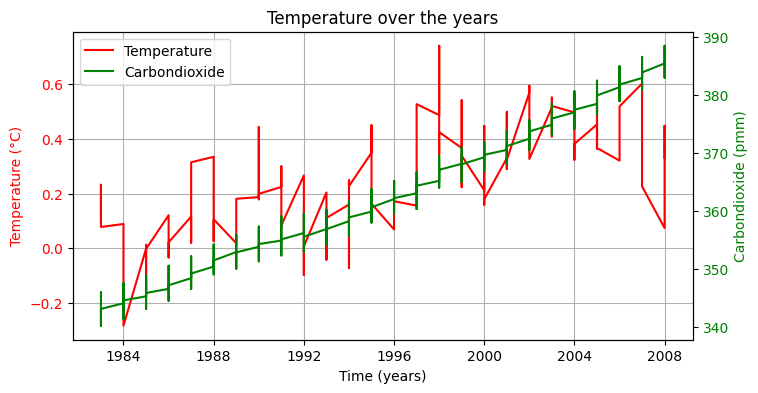

In [74]:
# plot date Vs Temperature
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(climate_df.index, climate_df['Temp'], label='Temperature', color='r')
ax.set_xlabel('Time (years)')
ax.set_ylabel('Temperature (°C)', color='r')
ax.tick_params(axis='y', labelcolor='r')
ax.set_title('Temperature over the years')

# create a twin plot for CO2
ax2 = ax.twinx()
ax2.plot(climate_df.index, climate_df['CO2'], label='Carbondioxide', color='g')
ax2.set_ylabel('Carbondioxide (pmm)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# created a legend
fig.legend(loc='upper left', bbox_to_anchor=(0 ,1), bbox_transform=ax.transAxes)
ax.grid()
plt.show()


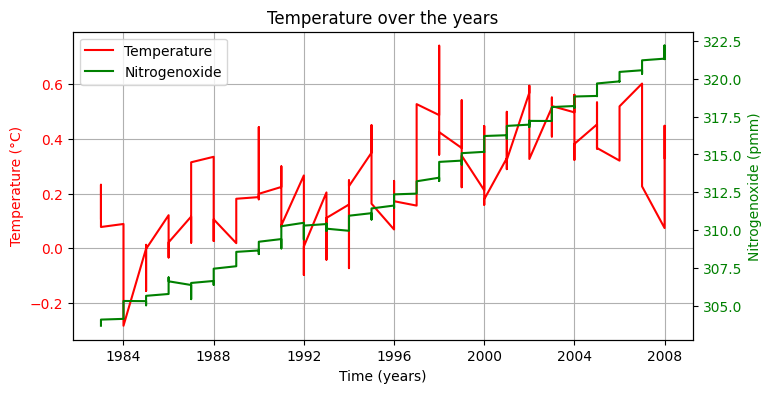

In [75]:
# plot date Vs Temperature
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(climate_df.index, climate_df['Temp'], label='Temperature', color='r')
ax.set_xlabel('Time (years)')
ax.set_ylabel('Temperature (°C)', color='r')
ax.tick_params(axis='y', labelcolor='r')
ax.set_title('Temperature over the years')

# create a twin plot for N2O
ax2 = ax.twinx()
ax2.plot(climate_df.index, climate_df['N2O'], label='Nitrogenoxide', color='g')
ax2.set_ylabel('Nitrogenoxide (pmm)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# created a legend
fig.legend(loc='upper left', bbox_to_anchor=(0, 1), bbox_transform=ax.transAxes)
ax.grid()
plt.show()


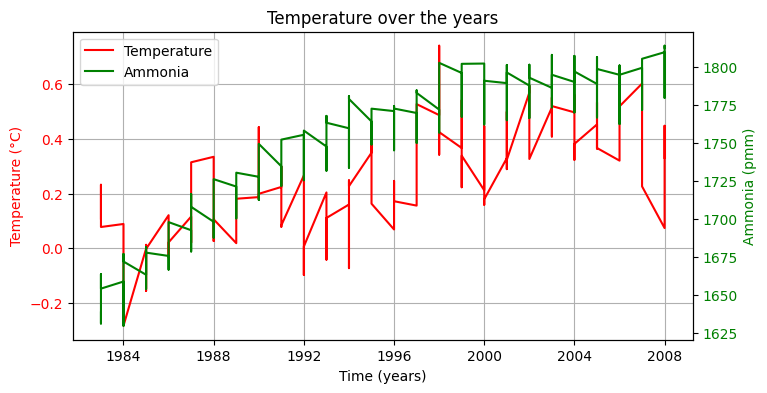

In [76]:
# plot date Vs Temperature
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(climate_df.index, climate_df['Temp'], label='Temperature', color='r')
ax.set_xlabel('Time (years)')
ax.set_ylabel('Temperature (°C)', color='r')
ax.tick_params(axis='y', labelcolor='r')
ax.set_title('Temperature over the years')

# create a twin plot for CH4
ax2 = ax.twinx()
ax2.plot(climate_df.index, climate_df['CH4'], label='Ammonia', color='g')
ax2.set_ylabel('Ammonia (pmm)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# created a legend
fig.legend(loc='upper left', bbox_to_anchor=(0, 1), bbox_transform=ax.transAxes)
ax.grid()
plt.show()


Here is a collection of the three important parameters of CO2, N2O and CH4, plotted on the graph using twins plot

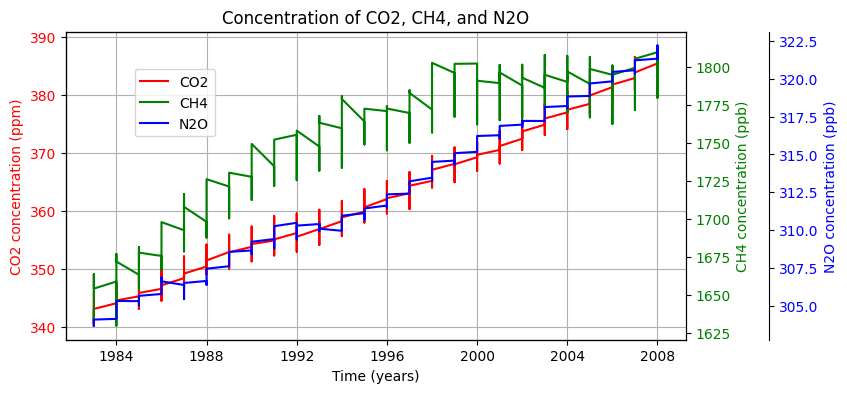

In [77]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(climate_df.index, climate_df['CO2'], label='CO2', color='r')
ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 concentration (ppm)', color='r')
ax.tick_params(axis='y', labelcolor='r')
ax.set_title('Concentration of CO2, CH4, and N2O')

# create a second y-axis for CH4
ax2 = ax.twinx()
ax2.plot(climate_df.index, climate_df['CH4'], label='CH4', color='g')
ax2.set_ylabel('CH4 concentration (ppb)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# create a third y-axis for N2O
ax3 = ax.twinx()
ax3.spines['right'].set_position(('outward', 60))  # move the third y-axis outward
ax3.plot(climate_df.index, climate_df['N2O'], label='N2O', color='b')
ax3.set_ylabel('N2O concentration (ppb)', color='b')
ax3.tick_params(axis='y', labelcolor='b')

# create a legend
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), bbox_transform=ax.transAxes)
ax.grid()
plt.show()

The plot of three was extended to include the temperature

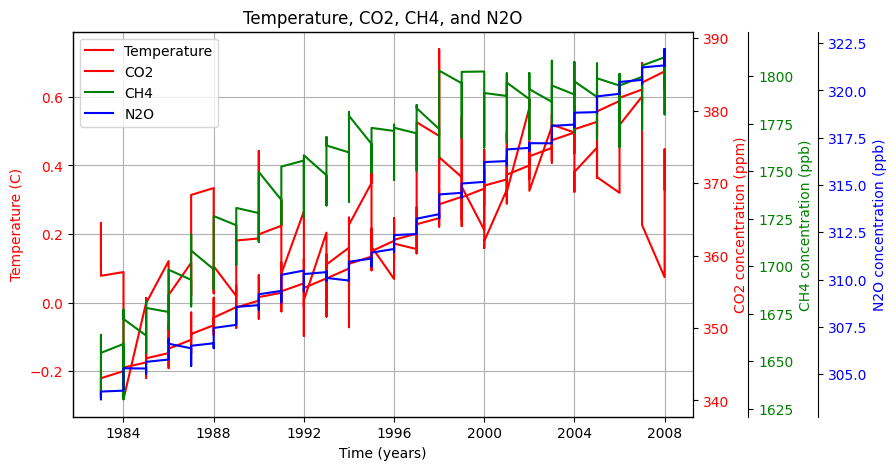

In [78]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(climate_df.index, climate_df['Temp'], label='Temperature', color='r')
ax.set_xlabel('Time (years)')
ax.set_ylabel('Temperature (C)', color='r')
ax.tick_params(axis='y', labelcolor='r')
ax.set_title('Temperature, CO2, CH4, and N2O')

# create second y-axis for CO2
ax2 = ax.twinx()
ax2.plot(climate_df.index, climate_df['CO2'], label='CO2', color='r')
ax2.set_xlabel('Time (years)')
ax2.set_ylabel('CO2 concentration (ppm)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# create a third y-axis for CH4
ax3 = ax.twinx()
ax3.spines['right'].set_position(('outward', 40)) 
ax3.plot(climate_df.index, climate_df['CH4'], label='CH4', color='g')
ax3.set_ylabel('CH4 concentration (ppb)', color='g')
ax3.tick_params(axis='y', labelcolor='g')

# create a fourth y-axis for N2O
ax4 = ax.twinx()
ax4.spines['right'].set_position(('outward', 90))  # move the third y-axis outward
ax4.plot(climate_df.index, climate_df['N2O'], label='N2O', color='b')
ax4.set_ylabel('N2O concentration (ppb)', color='b')
ax4.tick_params(axis='y', labelcolor='b')

# create a legend
fig.legend(loc='upper left', bbox_to_anchor=(0, 1), bbox_transform=ax.transAxes)
ax.grid()
plt.show()

Defining a function

Looking at the above code, they seem to be too much, however python is here for us to shorten the code by defining a function

In [79]:
def time_series_plot(axes, x, y, color, xlabel, ylabel):
    # Plot the inputs x,y in the provided color
    axes.plot(x, y, color=color)

    # Set the x-axis label
    axes.set_xlabel(xlabel)

    # Set the y-axis label
    axes.set_ylabel(ylabel, color=color)

    # Set the colors tick params for y-axis
    axes.tick_params('y', colors=color)

C:\Users\PC\AppData\Local\Temp\ipykernel_13984\3090861497.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left', bbox_to_anchor=(0, 1), bbox_transform=ax.transAxes)


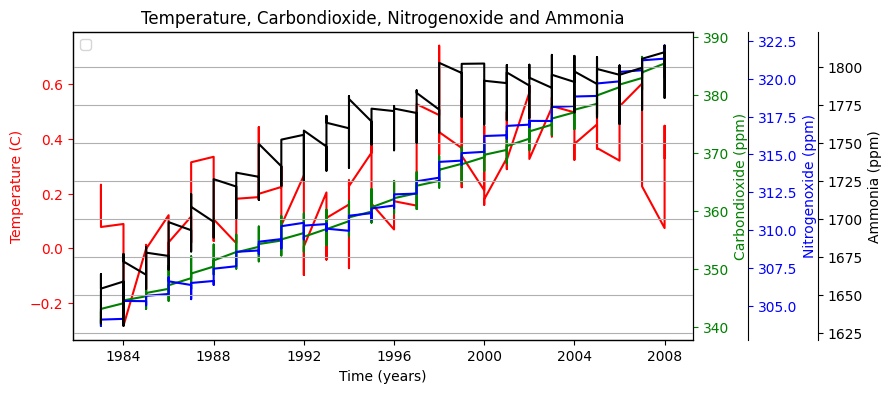

In [80]:
fig, ax = plt.subplots(figsize=(8, 4))

time_series_plot(ax, climate_df.index, climate_df['Temp'], 'r', 'Time (years)', 'Temperature (C)')

ax2 = ax.twinx()
time_series_plot(ax2, climate_df.index, climate_df['CO2'], 'g', 'Time (years)', 'Carbondioxide (ppm)')

ax3 = ax.twinx()
ax3.spines['right'].set_position(('outward', 40))
time_series_plot(ax3, climate_df.index, climate_df['N2O'], 'b', 'Time (years)', 'Nitrogenoxide (ppm)')

ax4 = ax.twinx()
ax4.spines['right'].set_position(('outward', 90))
time_series_plot(ax4, climate_df.index, climate_df['CH4'], 'k', 'Time (years)', 'Ammonia (ppm)')

# Display the plot
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), bbox_transform=ax.transAxes)
ax.set_title("Temperature, Carbondioxide, Nitrogenoxide and Ammonia")
plt.grid()

Annotating Time-Series Data

This is a small piece of text focusing on a particular part/point in a visualization to explain the feature of interest.

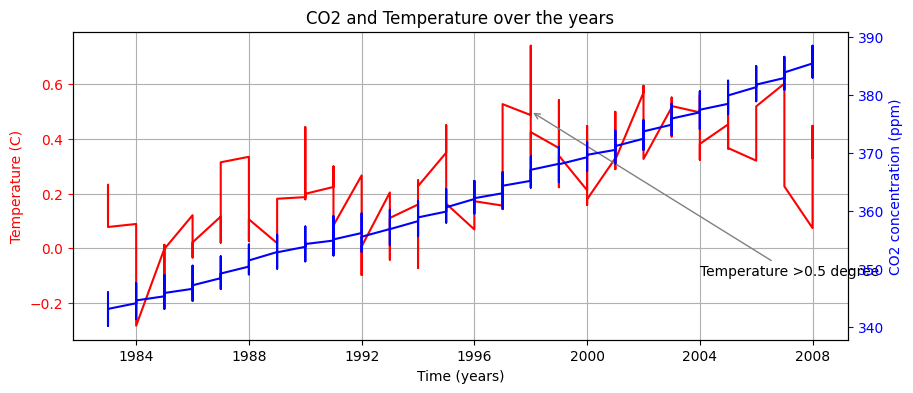

In [86]:
# Calling thefunction earlier define to plot CO2 by time
fig, ax=plt.subplots(figsize=(10,4))
time_series_plot(ax, climate_df.index, climate_df['Temp'], 'r','Time (years)', 'Temperature (C)')

ax2 = ax.twinx()
time_series_plot(ax2, climate_df.index, climate_df['CO2'], 'b','Time (years)', 'CO2 concentration (ppm)')

# locating the position where tempearature exceed 0.5 for the first time
ax.annotate("Temperature >0.5 degree", xy=(pd.Timestamp("1998-01-01"), 0.5),
            # Finding suitable location for the tex
            xytext=(pd.Timestamp("2004-01-01"), -0.1),
            # customizing the arrow
            arrowprops={"arrowstyle":"->", "color":"gray"})

ax.set_title('CO2 and Temperature over the years')
ax.grid()
plt.show()

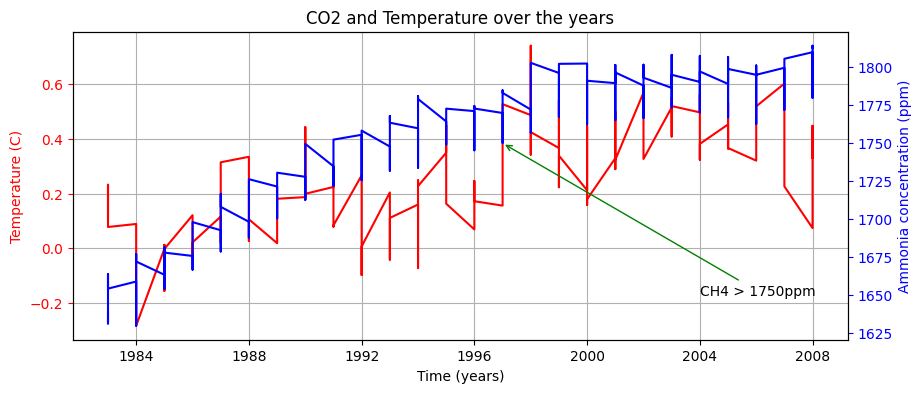

In [84]:
# Calling thefunction earlier define to plot Temp and CH4 by time
fig, ax=plt.subplots(figsize=(10,4))
time_series_plot(ax, climate_df.index, climate_df['Temp'], 'r','Time (years)', 'Temperature (C)')

ax2 = ax.twinx()
time_series_plot(ax2, climate_df.index, climate_df['CH4'], 'b','Time (years)', 'Ammonia concentration (ppm)')

# locating the position where tempearature exceed 0.5 for the first time
ax2.annotate("CH4 > 1750ppm", xy=(pd.Timestamp("1997-01-01"), 1750),
            # Finding suitable location for the tex
            xytext=(pd.Timestamp("2004-01-01"), 1650),
            # using arrow to point at the location
            arrowprops={"arrowstyle":"->", "color":"green"})

ax.set_title('CO2 and Temperature over the years')
ax.grid()
plt.show()

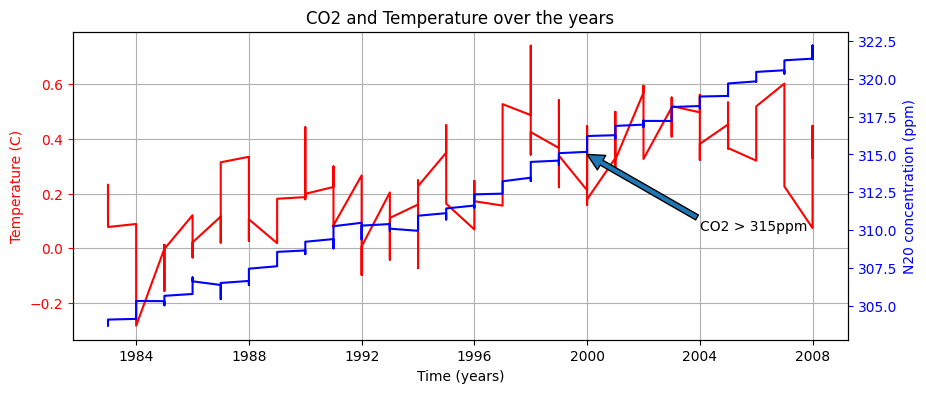

In [85]:
# Calling thefunction earlier define to plot Temp and CH4 by time
fig, ax=plt.subplots(figsize=(10,4))
time_series_plot(ax, climate_df.index, climate_df['Temp'], 'r','Time (years)', 'Temperature (C)')

ax2 = ax.twinx()
time_series_plot(ax2, climate_df.index, climate_df['N2O'], 'b','Time (years)', 'N20 concentration (ppm)')

# locating the position where tempearature exceed 0.5 for the first time
ax2.annotate("CO2 > 315ppm", xy=(pd.Timestamp("2000-01-01"), 315),
            # Finding suitable location for the tex
            xytext=(pd.Timestamp("2004-01-01"), 310),
            # Default arrow
            arrowprops={})

ax.set_title('CO2 and Temperature over the years')
ax.grid()
plt.show()